In [1]:
from qiskit import *

In [2]:
cirq = QuantumCircuit(3, 3)  # quantum circuit containing 3 qubits and 3 classical bits

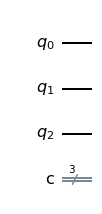

In [3]:
cirq.draw()

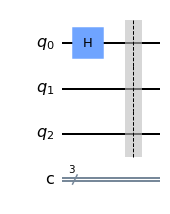

In [5]:
# we will teleport the state of q0 over to q2; q1 will be required in this process
cirq.h(0)
cirq.barrier() # draws a vertical line in the circuit drawing, just to make the circuit look good
cirq.draw()

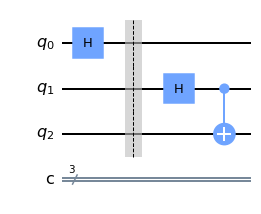

In [6]:
cirq.h(1)       # we want to
cirq.cx(1, 2)   # enatngle qubits 1 & 2
cirq.draw()

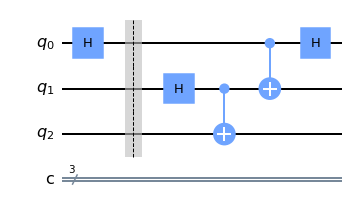

In [7]:
cirq.cx(0, 1)
cirq.h(0)
cirq.draw()

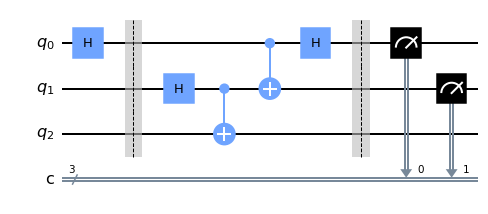

In [8]:
cirq.barrier()
cirq.measure([0,1], [0,1])
cirq.draw()

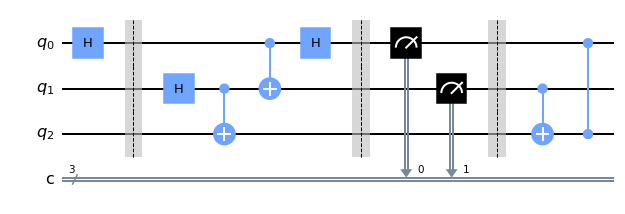

In [9]:
cirq.barrier()
cirq.cx(1, 2)
cirq.cz(0, 2)
cirq.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


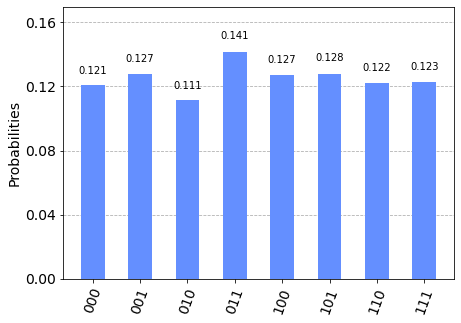

In [11]:
# the teleportation protocol is complete
# we now expect to see the state (|0>+|1>)/root(2) in q2, which was earlier in q0

cirq.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(cirq, backend=simulator, shots=2048).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [12]:
# notice that in all the outcomes, the bit c2 roughly 50% times 0 and 50% times 1
print(counts)

{'100': 260, '110': 250, '010': 228, '000': 247, '111': 251, '011': 289, '001': 261, '101': 262}


In [ ]:
# summary: state of q0, after applying an H gate, was teleported to q2